In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pylab import cm
import mpltex
import itertools
from matplotlib import pyplot
from scipy import stats
from copy import deepcopy
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

In [2]:
# policies = ["No Investigation", "MinFP", "Random",  "Bayes", "MaxEntropy","All"]
r_lst = [0.3,0.4]
f_output = {}
for r in r_lst:
    file = open(f"result_0.5_[1, 1]_{r}.pkl",'rb')
    object_file = pickle.load(file)
    file.close()
    temp = {}
    for k,v in object_file.items(): 
        temp[k] ={}
        for k2,v2 in v.items():
            if k2.split('_')[0] == "LowFP":
                temp[k]['MinFP_'+ k2.split('_')[1]] = v2
            elif k2.split('_')[0] == "No investigation":
                temp[k]['No Investigation_'+ k2.split('_')[1]] = v2
            else:
                temp[k][k2] = v2
    object_file = temp
    save_dict = {}
    policies_list = []
    metrics_list = []
    omega_list = []
    for metric, v in object_file.items():
        for k2, v2 in v.items():
            policy = k2.split('_')[0] 
            omega = k2.split('_')[1]
            omega_list.append(omega)
            save_dict[omega] = {}

    for metric, v in object_file.items():
        metrics_list.append(metric)
        for k,v in save_dict.items():
            save_dict[k][metric] = {}

    for metric, v in object_file.items():
        for k2, v2 in v.items():
            policy = k2.split('_')[0] 
            if policy not in policies_list:
                policies_list.append(policy)
            omega = k2.split('_')[1]
            try:
                save_dict[omega][metric][policy] = v2
            except:
                save_dict[omega][metric] = {}
                save_dict[omega][metric][policy] = v2
    policies_list = np.unique(policies_list)
    omega_list = list(set(omega_list))
    f_output[r] = deepcopy(save_dict)
policies = sorted(policies_list)


In [3]:
for r in f_output:
    for omega in f_output[r]:
        f_output[r][omega] =  f_output[r][omega]['MSE']

In [4]:
r_policy_omega_dict = {}
for r in f_output:
    r_policy_omega_dict[r]= {}
    omegas_str = np.array(list(f_output[r].keys()))
    policies = f_output[r][omegas_str[0]].keys()
    omegas_float = np.array(omegas_str, dtype=np.float32)
    for p in policies:
        r_policy_omega_dict[r][p]= []
        for o in omegas_str:
            r_policy_omega_dict[r][p].append(f_output[r][o][p])
        r_policy_omega_dict[r][p] = np.array(r_policy_omega_dict[r][p])
            

In [5]:
policies_list

array(['All', 'Bayes', 'MaxEntropy', 'MinFP', 'No Investigation',
       'Random'], dtype='<U16')

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


All [0.12962777 0.23057572 0.24477597 0.27844892 0.2911545 ]
Bayes [0.15397301 0.26786227 0.26791314 0.28366067 0.28950561]
MaxEntropy [0.15736478 0.27186837 0.27460207 0.30036527 0.29489915]
MinFP [0.24664787 0.33579833 0.34344749 0.37241983 0.38342616]
No Investigation [0.45938574 0.45938574 0.45938574 0.45938574 0.45938574]
All [0.12962777 0.24335796 0.26447561 0.2911545  0.32825546]
Bayes [0.15959169 0.28634805 0.31051195 0.29433233 0.3313179 ]
MaxEntropy [0.16019392 0.27258623 0.30688661 0.30592056 0.32682932]
MinFP [0.24503451 0.34774056 0.38334582 0.3725939  0.39320149]
No Investigation [0.45938574 0.45938574 0.45938574 0.45938574 0.45938574]


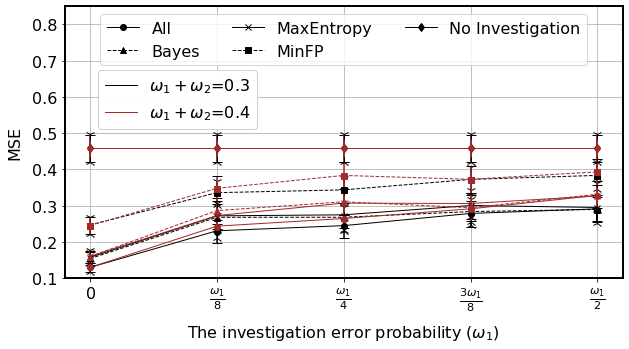

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))

i = 0
x_axis = [r'$0$',r'$\frac{\omega_1}{8}$',r'$\frac{\omega_1}{4}$',r'$\frac{3\omega_1}{8}$',r'$\frac{\omega_1}{2}$']
locs = ["upper center", "upper right"]
l = ['-', '--']
m = ['o','^', 'x', 's', 'd']
c = ['black', 'brown']
cc = itertools.cycle(c)
ll = itertools.cycle(l)
mm = itertools.cycle(m)
for r, policy_omega_dict in r_policy_omega_dict.items():
    ccc = next(cc)    
    ll = itertools.cycle(l)
    for policy in policies_list:
        if policy != 'Random':
            mmm = next(mm)    
            lll = next(ll)
            val = policy_omega_dict[policy].mean(axis=1)
            print(policy, val[:,-1])
            ax.plot(x_axis, 
                    val[:,-1], 
                    lll,
                    lw=1,
                    label=f'{policy}', 
                    marker = mmm,
                    color = ccc,
                    markevery=1
                    )
            ax.set_title('')
            # ax.set_xscale('log')
            if r==0.3:
                ax.legend(loc=locs[i], ncol=3)
            ax.set_xlabel(r'Relative investigation error probability ($\omega_1$/($\omega_1$+$\omega_2$))', labelpad=10)

            

    if i == 0:
        ax.set_ylabel('MSE', labelpad=10)
        ax.set_ylim([0.1, 0.7])
    else:
        ax.set_ylabel('MSE', labelpad=10)

    i += 1

lines = ax.get_lines()

legend1 = pyplot.legend([lines[i] for i in [0,1,2,3,4]], policies_list, ncol = 3, loc="upper center")
ax.add_artist(legend1)
for l in lines:
    l.set_marker('')
legend2 = pyplot.legend([lines[i] for i in [0,len(policies)-1] ], ["$\omega_1 + \omega_2$=0.3", "$\omega_1 + \omega_2$=0.4"], loc=(0.06,0.55))
ax.add_artist(legend2)

up_marker = ['_', "1"]
down_marker = ['_', "2"]
up = itertools.cycle(up_marker)
down = itertools.cycle(down_marker)
for r, policy_omega_dict in r_policy_omega_dict.items():
    ccc = next(cc)    
    mm = itertools.cycle(m)
    for policy in policies_list:
        if policy != 'Random':
            mmm = next(mm)    
            u = next(up)    
            d = next(down)
            val = policy_omega_dict[policy]
            mean = val[:,1:].mean(axis=1)[:,-1]
            std = val.std(axis = 1)[:,-1]
            n= val.shape[1]
            yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
            # print(x_axis, mean, std)
            bar1 = plt.errorbar(x_axis, 
                                y=mean, 
                                linestyle='', 
                                yerr=yerr,                         
                                # label=f'{policy}', 
                                marker=mmm, 
                                color=ccc, 
                                # markevery=10, 
                                capsize=0
                                )
            
            plt.plot(x_axis,mean+yerr, marker=u, ls="", color="black", ms=10)
            plt.plot(x_axis,mean-yerr, marker=d, ls="", color="black", ms=10)
ax.set_ylim([0.1, 0.85])

plt.grid()
plt.show()
fig.savefig('constant_omega_vs_mse.eps', format='eps', bbox_inches='tight')
